#### The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [53]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

### Preparing the dataset

Preparation:

- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.


### Question 1

Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

- 'vehicle_weight'
- 'model_year'
- 'origin'
- 'fuel_type'


### Question 2

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

- 0.045
- 0.45
- 4.5
- 45.0


### Question 3

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

If it doesn't stop improving, use the latest iteration number in your answer.

### Question 4

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
        try different values of n_estimators from 10 till 200 (with step 10)
        calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

    10
    15
    20
    25


### Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parameters:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature (among these 4)?

    vehicle_weight
    horsepower
    acceleration
    engine_displacement


### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

    0.3
    0.1
    Both give equal value


## Question-1

In [54]:
import pandas as pd

In [55]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [56]:
df = pd.read_csv(data)

In [57]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [58]:
df = df.fillna(0)

In [59]:
df.colums = df.columns.str.lower()

C:\Users\AJAY\AppData\Local\Temp\ipykernel_20948\4157383517.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.lower()


In [60]:
df.fuel_efficiency_mpg.value_counts

<bound method IndexOpsMixin.value_counts of 0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64>

In [61]:
df.describe().round()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0,9704.0
mean,200.0,4.0,139.0,3001.0,14.0,2011.0,-0.0,15.0
std,49.0,2.0,48.0,498.0,5.0,7.0,1.0,3.0
min,10.0,0.0,0.0,953.0,0.0,2000.0,-4.0,6.0
25%,170.0,2.0,124.0,2666.0,13.0,2006.0,-1.0,13.0
50%,200.0,4.0,146.0,2993.0,15.0,2012.0,0.0,15.0
75%,230.0,5.0,168.0,3335.0,16.0,2017.0,1.0,17.0
max,380.0,13.0,271.0,4739.0,24.0,2023.0,4.0,26.0


In [62]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

In [63]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [64]:
y_train = (df_train.fuel_efficiency_mpg ).astype('int').values
y_val = (df_val.fuel_efficiency_mpg ).astype('int').values
y_test = (df_test.fuel_efficiency_mpg).astype('int').values

In [65]:
del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']

In [66]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [68]:
dv = DictVectorizer(sparse=True)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [69]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3000.14
|   |--- class: 16
|--- vehicle_weight >  3000.14
|   |--- class: 13



## Question -2

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [122]:
def rmse(y, y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [123]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)


In [124]:
from math import sqrt
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = sqrt(mean_squared_error(y_val, y_pred))

print("RMSE:", rmse)


RMSE: 0.5521537615591471


## quaetion- 3

In [91]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    print("RMSE:", rmse)
    scores.append((n, rmse))

RMSE: 0.5521537615591471
RMSE: 0.5398625485759978
RMSE: 0.5377681407856293
RMSE: 0.5375196939947888
RMSE: 0.5358131426660638
RMSE: 0.5350016303889755
RMSE: 0.5349423795327297
RMSE: 0.5341265463991317
RMSE: 0.5339512730005677
RMSE: 0.5332964953789905
RMSE: 0.5325280472918882
RMSE: 0.5335674355804211
RMSE: 0.5336441146894658
RMSE: 0.5334016715935443
RMSE: 0.5334010346863358
RMSE: 0.5333729025200943
RMSE: 0.5332588115487745
RMSE: 0.5332408996931902
RMSE: 0.533397006835571
RMSE: 0.5335671418851955


In [95]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

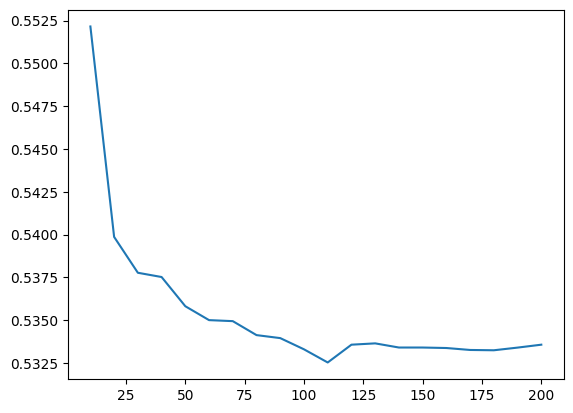

In [96]:
import matplotlib.pyplot as plt
plt.plot(df_scores.n_estimators, df_scores.rmse)

## Question 4

In [98]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

In [99]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

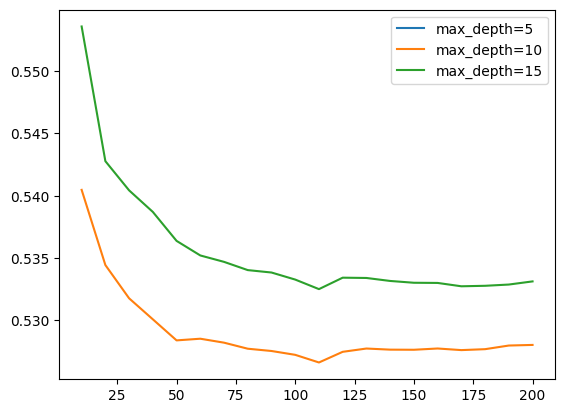

In [100]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

## Question 5

In [101]:
rf = RandomForestRegressor(n_estimators=10,
                                    max_depth=20,
                                    random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
feature_names = dv.get_feature_names_out()

In [108]:
# Get feature importances from the trained model
importances = rf.feature_importances_

# Build dataframe
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df.head(25))   # Top 25 features

                         Feature  Importance
13                vehicle_weight    0.948906
6                     horsepower    0.017737
0                   acceleration    0.014435
7                     model_year    0.004654
3            engine_displacement    0.004618
8                  num_cylinders    0.003128
9                      num_doors    0.002410
12                    origin=USA    0.000861
10                   origin=Asia    0.000642
11                 origin=Europe    0.000640
4               fuel_type=Diesel    0.000566
2   drivetrain=Front-wheel drive    0.000488
5             fuel_type=Gasoline    0.000486
1     drivetrain=All-wheel drive    0.000429


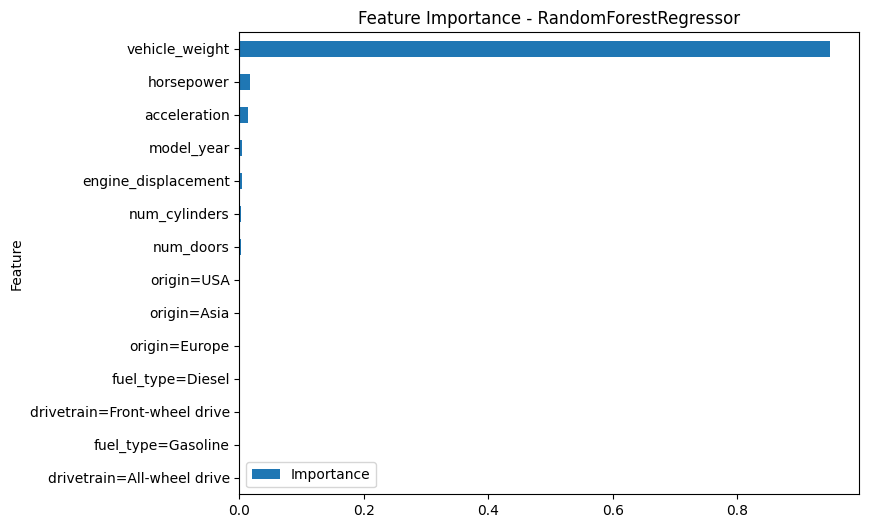

In [120]:
import matplotlib.pyplot as plt

feature_importance_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title('Feature Importance - RandomForestRegressor')
plt.show()


## Question-6

In [111]:
import xgboost as xgb

In [112]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [114]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(rmse)

In [119]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(rmse)

0.5213305642968289
